# `hotAD`

A Python package for forward mode automatic differentiation for multivariate functions, Jacobian/Hessian matrix computation, root-finding, and optimization routines.

<hr>

# 1. Introduction

Classically, scientists have used symbolic differentiation and finite difference method to compute derivatives of functions, but these approaches face issues of increasing errors and increasing time cost in evaluating the derivatives as dimensions and complexities of the function go up. Automatic differentiation (AD) applies the chain rule - a rudimentary differentiation technique - over and over on a series of elementary arithmetic operations that make up any function. As the order increases, the complexity of AD calculation is not worse than the original function, therefore achieving efficiency.

Our Python package employs the forward mode of AD to evaluate the first and second derivatives of functions. Users are welcome to use our forward mode AD module and accompanying the elementary functions module for their own applications or to take advantage of our even more user-friendly Jacobian-calculating and optimization module.

# 2. How to use the package

Users can install the package in one of two ways:
* **[Pip](https://pypi.org/project/hotAD/?fbclid=IwAR2zgoybP2w9GoLlzv-SsfegraY5ODgdgABdEPeHnwgVLrUnmN-zhlMhiS8)**: `pip install hotAD`
* **[Download source code](https://github.com/CS207ProjectGroup8/cs207-FinalProject/tree/master/hotAD/hotAD)**: Find the code under `hotAD/hotAD` and the requirements to install in the `requirements.txt` file in the main repository.

Once in a Python script or a Jupyter notebook, we suggest importing the three modules as follows:

In [9]:
from hotAD.AutoDiffObject import AutoDiff
from hotAD.ElementaryFunctions import ElementaryFunctions as ef
from hotAD import ADfun as adf

**Note**: `ADfun` must be imported after `ElementaryFunctions`.

Once in a Python interpreter, users can instantiate `AutoDiff` objects for variables that they wish to differentiate. These objects can be instantiate by calling `AutoDiff(2, 'x', H=True)`, where the first argument is the value of the variable the user wishes to evaluate, the second argument is a one character string denoting the variable name (to be returned for the first and second derivatives), and an optional argument `H` to specifcy whether or not they would like to compute the second derivative.

In [10]:
x = AutoDiff(3, 'x', H=True)  
y = AutoDiff(4, 'y', H=True)   

After creating the `AutoDiff` objects, users can combine these variables into functions using basic operators like `+`, `-`, `*`, and `/` and elementary functions from our module. The elementary functions we currently have implemented are:
* trigonometric functions (`sin`, `cos`, `tan`, `arcsin`, `arccos`, `arctan`)
* power functions (`power`, `sqrt`)
* exponential functions (`log`, `exp`)
* logistic function (`logit`)



In [11]:
f = ef.sin(x)
g = ef.power(x, y)
h = ef.sqrt(x*x*y*y)

In [12]:
print("sin(x) evaluated at x=3")
print('Value:', f.val, '\nFirst derivative:', f.der, '\nSecond derivative:', f.der2)
print("\nx^y evaluated at x=3 and y=4")
print('Value:', g.val, '\nFirst derivative:', g.der, '\nSecond derivative:', g.der2)
print("\nsqrt(x^2 * y^2) evaluated at x=3 and y=4")
print('Value:', h.val, '\nFirst derivative:', h.der, '\nSecond derivative:', g.der2)

sin(x) evaluated at x=3
Value: 0.1411200080598672 
First derivative: {'x': -0.9899924966004454} 
Second derivative: {'x': -0.1411200080598672}

x^y evaluated at x=3 and y=4
Value: 81 
First derivative: {'x': 108.0, 'y': 88.9875953821169} 
Second derivative: {'x': 108.0, 'xy': 145.65012717615585, 'yx': 145.65012717615585, 'y': 97.76286582581915}

sqrt(x^2 * y^2) evaluated at x=3 and y=4
Value: 12.0 
First derivative: {'x': 4.0, 'y': 3.0} 
Second derivative: {'x': 108.0, 'xy': 145.65012717615585, 'yx': 145.65012717615585, 'y': 97.76286582581915}


Users can also inspect how the function values and derivatives behave over an interval by iterating through a list or array of values and repeating the steps above.

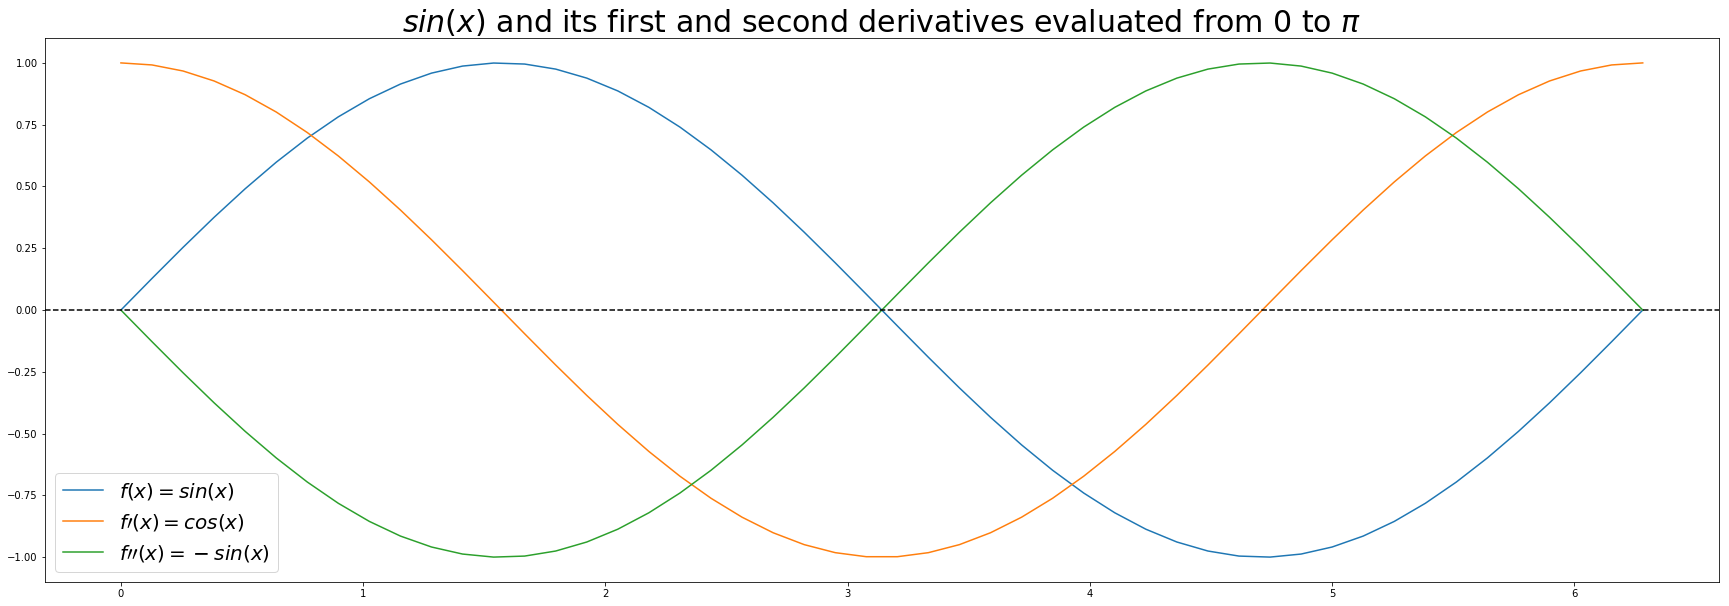

In [13]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = AutoDiff(i, "x", H=True)
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])
    
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=20)
plt.title(r'$sin(x)$ and its first and second derivatives evaluated from 0 to $\pi$', fontsize=30)
plt.show()

In `ADfun`, users can 
* compute the Jacobian matrix of a function (`J_F`)
* perform root-finding via Newton's Method (`Newton`)
* perform minimization (`Mini`)

## J_F

This function can be used to evaluate a function and the Jacobian (and Hessian, if applicable) matrix of that function at a specific point. This function takes three arguments:
* a function that takes in points as a list of length $m$ and outputs a list of length $n$
* a list of length $m$ of points at which to evaluate the function
* `H`, an optional argument specifying whether or not to compute the Hessian matrix
    * True: F needs to be a one-vector function, and the Hessian matrix of F will be calculated as well
    * False: No restriction on F, no second derivative information will be outputted

*Jacobian* ($f: \mathbb{R}^m \rightarrow \mathbb{R}^n$)

In [14]:
def A(x): 
    return [x[0]*3 + x[1]*x[2], x[2]-x[0]*x[1]+x[0]]

In [15]:
output = adf.J_F(A, [2,3,4])
print('A evaluated at (2,3,4):', output[0])
print('Jacobian matrix of A evaluated at (2,3,4):', output[1])

A evaluated at (2,3,4): [18.  0.]
Jacobian matrix of A evaluated at (2,3,4): [[ 3.  4.  3.]
 [-2. -2.  1.]]


*Jacobian and Hessian* ($ f: \mathbb{R}^m \rightarrow \mathbb{R}$)

In [16]:
def B(x):
    return [x[0]*3 + x[1]*x[2] + x[3]*x[3]]

In [17]:
out = adf.J_F(B, [2,3,4,8], H=True)
print('B evaluated at (2,3,4,8):', out[0])
print('Jacobian matrix of B evaluated at (2,3,4,8):', out[1])
print('Hessian matrix of B evaluated at (2,3,4,8):', out[2])

B evaluated at (2,3,4,8): [82.]
Jacobian matrix of B evaluated at (2,3,4,8): [[ 3.  4.  3. 16.]]
Hessian matrix of B evaluated at (2,3,4,8): [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]


## Newton

This function performs root-finding via Newton's Method. As arguments, this function takes in:
* a function that takes in points as a list of length $m$ and outputs a list of length $n$
* a list of length $m$, constituting an initial guess for the root

For example, consider the following two-vector function: 

$f_1(x, y) = x^2 + 4\cdot y + sin(x) \cdot tan(y)$

$f_2(x, y) = y + \frac{xy}{sin(x)}$

We want to find a root $(x_0, y_0)$ of this system of equations, such that $f_1(x_0, y_0) = 0$ and $f_2(x_0, y_0) = 0$.

In [18]:
def F(x):
    F_1 = x[0] * x[0] +4 * x[1] + ef.sin(x[0])* ef.tan(x[1])
    F_2 = x[1] + x[0]*x[1] / ef.sin(x[0])
    return [F_1, F_2]

In [19]:
adf.Newton(F, [3,2])

{'x_min: ': array([7.13930022e-09, 0.00000000e+00]),
 'F(x_min): ': array([5.09696076e-17, 0.00000000e+00]),
 'number of iter: ': 63}

## Mini

This minimization function works for both the univariate and bivariate function case. The arguments to the function `Mini` are:
* a function that takes in points as a list of length $m$ and outputs a list of length $n$
* a list of length $m$, constituting an initial guess for the minimum 
* method: `newton`, `quasi-newton-BFGS`, and `gradient-descent`
    * default: `quasi-newton-BFGS`
* criteria: if the change in the x value is less than this value, the function will stop
    * default: $10^{-8}$
* max_iter_GD: maximum number of iterations until method stops (for all methods)
    * default: 5000
* rate: learning rate (only for `gradient-descent` method)
    * default: 0.0001 
* plot: when True, the iteration steps of the method to get to the solution are visualized
    * default: False

*Univariate*

Consider the following function: 

$d(x) = x^2 + 2$

In [20]:
def D(x):
    return [x[0]*x[0] + 2]

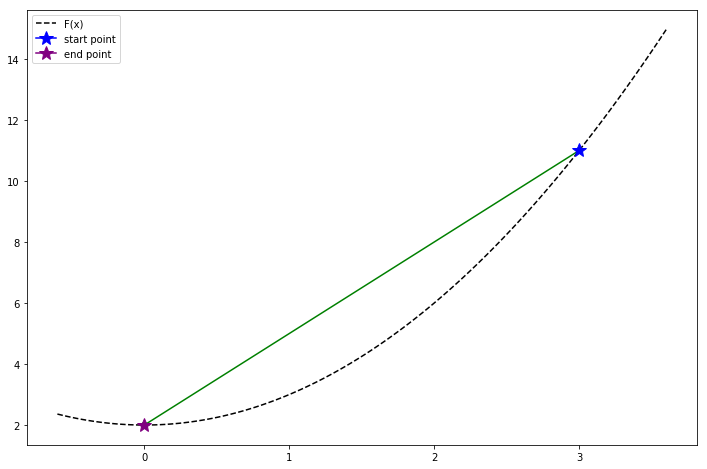

In [21]:
newton_result1 = adf.Mini(D, [3], method = "newton", plot = True)

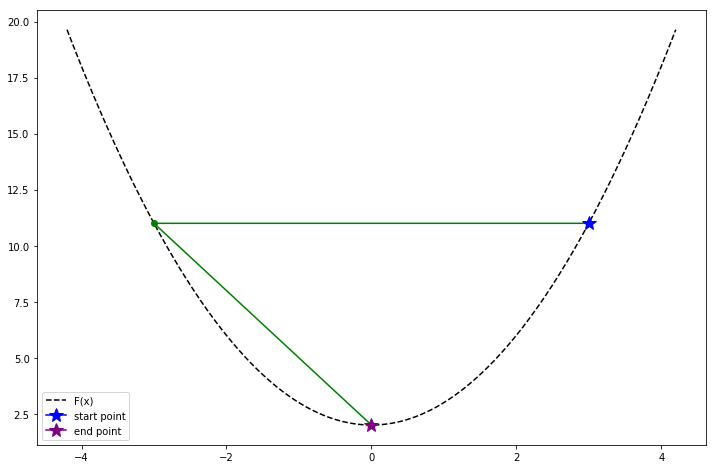

In [22]:
bfgs_result1 = adf.Mini(D, [3], method = "quasi-newton-BFGS", plot = True)

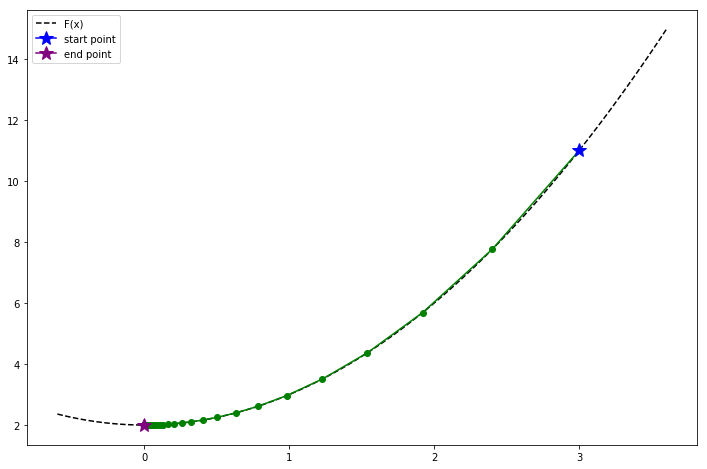

In [23]:
gd_result1 = adf.Mini(D, [3], method = "gradient-descent", rate = 0.1, plot = True)

In [24]:
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |          {}          |           {}           |        {}      ".format(bfgs_result1['x_min'], newton_result1['x_min'], gd_result1['x_min']))
print("   G(x_min)    |          {}           |            {}           |       {}   ".format(bfgs_result1['min F(x)'][0], newton_result1['min F(x)'][0], gd_result1['min F(x)'][0]))
print("   # iterations|           {}            |             {}            |                {}    ".format(bfgs_result1['number of iter'], newton_result1['number of iter'], gd_result1['number of iter']))


---------------------------------------Result Comparison------------------------------------
   Items       |          BGFS          |           Newton         |        Gradient-Descent   
   x_min       |          [0.]          |           [0.]           |        [3.39234636e-08]      
   G(x_min)    |          2.0           |            2.0           |       2.0000000000000013   
   # iterations|           2            |             2            |                82    


*Bivariate*

Now consider the following function: 

$g(x, y) = 100 (y-x^2)^2 + (1-x)^2$

In [25]:
def G(x):
    return [100*ef.power((x[1]-x[0]*x[0]),2) + ef.power((1-x[0]),2)]

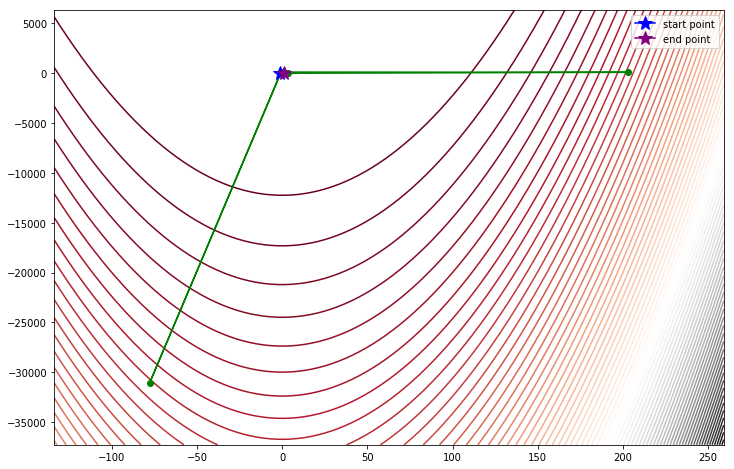

In [26]:
BGFS_result = adf.Mini(G, [-1, 0.5], plot = True)

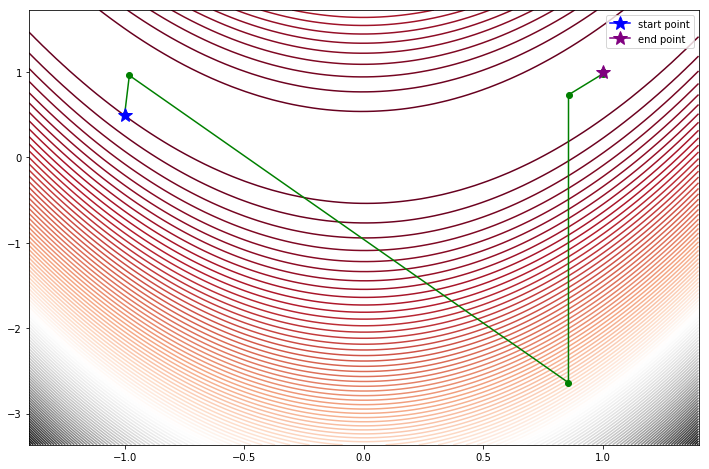

In [27]:
newton_result = adf.Mini(G, [-1, 0.5], method = "newton", plot = True)

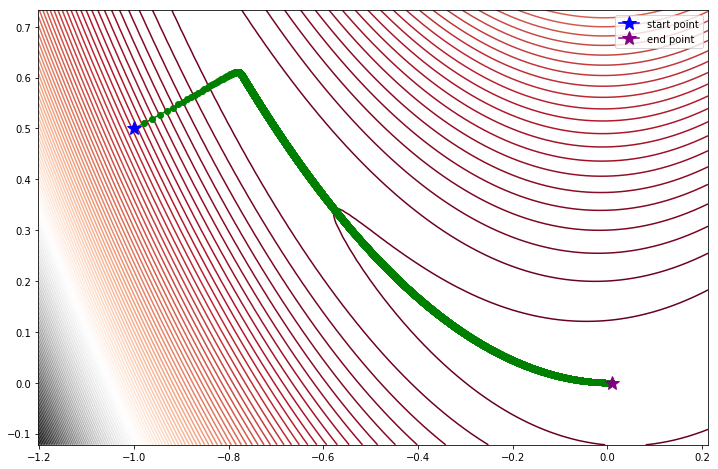

In [28]:
gd_result = adf.Mini(G, [-1, 0.5], method = "gradient-descent", plot = True)

In [29]:
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |         {}        |           {}        |    {}    ".format(BGFS_result['x_min'], newton_result['x_min'], gd_result['x_min']))
print("   G(x_min)    | {} |            {}           |      {}   ".format(BGFS_result['min F(x)'][0], newton_result['min F(x)'][0], gd_result['min F(x)'][0]))
print("   # iterations|           {}           |             {}            |             {}    ".format(BGFS_result['number of iter'], newton_result['number of iter'], gd_result['number of iter']))

---------------------------------------Result Comparison------------------------------------
   Items       |          BGFS          |           Newton         |        Gradient-Descent   
   x_min       |         [1. 1.]        |           [1. 1.]        |    [0.01081477 0.0001002 ]    
   G(x_min)    | 6.263555587454834e-28 |            0.0           |      0.9784874471289331   
   # iterations|           75           |             7            |             5000    


**Additional note**: If attempting to use our package in a virtual environment (namely `virtualenv`), please follow these additional instructions when attempting to use `ADfun` so that the plots are displayed correctly:

*From the command line*:
1. `$ cd ~/.matplotlib`
2. `$ nano matplotlibrc`
3. Add `backend: TkAgg` to `matplotlibrc`

*From the Python interpreter*:
* `import matplotlib.pyplot as plt` before calling one of the functions from `ADfun`
* `plt.show()` after running the function to view the plot

# 3. Background
Our software deploys the Forward Mode of AD to evaluate the derivatives of functions. Specifically, the software efficiently evaluates at machine precision the Jacobian matrix (a $m\times n$ matrix) of any function $f: R^n \rightarrow R^m$.

**Importance of the Jacobian Matrix**

Evaluating the Jacobian matrix is significant. The Jacobian matrix provides information of (partial) derivatives of the function, which can be used in many different ways. For example, it can be used to linearly approximate the function about the differentiation point, and it can be used to find the function’s extrema and roots. Moreover, Jacobian matrix is critical in a lot of optimization problems across different scientific fields.  

One example of the utilization of Jacobian matrix is the famous Newton’s Method for root finding. The core of the method is that it utilizes evaluation of the Jacobian matrix in each step of its iterations to linearly approximate the given function.

**Importance of High Accuracy and Efficiency**

It is important to evaluate the Jacobian matrix with high accuracy, as small errors could accumulate in higher dimensions and over iterations. It is also important to evaluate the Jacobian matrix efficiently, considering the time cost of the calculation as the complexity and dimension of the function go up.

**Problems with Classical Methods**

Both Symbolic Differentiation and Finite Difference Method face issues of increasing errors and increasing time cost in evaluating the derivatives as dimensions and complexities of the function go up.

**Advantages of the Software (Forward AD)**

Our software, by using Forward AD, can evaluate the Jacobian Matrix of any function $f: R^n \rightarrow R^m$ up to machine precision efficiently. Every function, regardless of its complexity, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication and division) and elementary functions (sine, cosine, logarithm, etc). Using this fact, AD applies chain rule repeatedly on these operations, and can therefore compute derivatives of any order up to machine precision of the given function. As the order increases, the complexity of AD calculation is not worse than the original function, therefore achieving efficiency. 

# 4. Software organization


Our directory structure is as follows.
  ```
     ...\
           hotAD\
                 hotAD\
                       __init__.py
                       ADfun.py
                       AutoDiffObject.py
                       ElementaryFunctions.py
                 setup.py
                 LICENSE
                 README.md
                 .coverage
                 hotAD.egg-info\
                       ...
                 dist\
                       ...
           docs\
                 milestone1.ipynb
                 milestone2.ipynb
                 documentation.ipynb
                 presentation.ipyb
                 images\
                      ...
           tests\
                 __init__.py
                 test_adfun.py
                 test_autodiff_object.py
                 test_elem_functions.py
                 
           README.md
           setup.cfg
           requirements.txt
           .gitignore
           .travis.yml
  ```
 Our package features three main modules:

  * `ADfun`
    * This module calculates the Jacobian matrix (Hessian matrix if users speicfy) and implements Newton's method for root finding. It also allows users to choose among Newton, quasi-Newton-BFGS and gradient descent optimization method. A dicionary with closest solution to user's initial guess, function value evaluated at minimization point, number of iterations, trace of approximated value for each iteration and jacobian&hessian matrix is returned.
  * `AutoDiffObject`
    * This module implements the forward mode of automatic differentiation. Users will instantiate the variables of their desired function as `AutoDiffObject` objects and will insert these objects into equations in order to compute the value and derivative/partial derivatives of that function for a value specified at the object's instantiation. Users can also specify if they want to access the Hessian matrix by setting H = True in the initiation. If H is set to be true, the `AutoDiffObject` objects will contain the information of the second derivatives. 
  * `ElementaryFunctions`
    * This module overloads the elementary functions (sine, cosine, tangent, arcsine, arccosine, arctangent, exponential, power, logarithm, square root, logistic) to return both their values and their derivates (with chain rule implemented) when they are called. Second derivatives will also be returned if users specify. Each function in this module is implemented as static method. Values will be returned using `numpy` and derivatives will be returned using a combination of `numpy` and simple symbolic differentation.
    
We use both TravisCI and Coveralls for our test suite. We use TravisCI to run tests and Coveralls to gauge code coverage. Our tests, which live inside of a separate folder `src/tests` in our directory, are broken up by module and are intended to handle edge-case behaviors. We also include doctests to test basic functionality of our modules. 

Our package can be accessed by downloading the source code from the `hotAD/hotAD` folder, installing the necessary dependencies as listed in `requirements.txt`, or to be installed from pip by calling `pip install hotAD` and importing it within a Python interpreter. For distribution, we will eventually use the Python Package Index (PyPI).

# 5. Implementation Details

## Core Classes

* `ADfun` - This class defines the calculation of Jacobian/Hessian matrix and use the information to implement Newton method and various optimization methods. 

* `AutoDiffObject` - This class is used to define our automatic differentiation objects that contain information about the value of the object (numeric) and partial derivatives with respect to each variables. The class also overloads the basic arithmetic operations - negation, addition, multiplication and division.

* `ElementaryFunctions` - This class defines the elementary operations for automatic differentiation objects. We define sine, cosine, tangent, power, logrithmic and exponential.

## Core Data Structures:
* `Dictionary` - We use dictionaries to hold the partial derivative values of each variable for automatic differentiation objects. 

## Important Attributes:

`AutoDiffObject`

* `self.val` -  The value of an automatic differentiation object. For instance, if x is an `AutoDiffObject` with value of 3, then y = 2 * x, will assign y to be an `AutoDiffObject` with value of 6.

* `self.varName` -  Checks whether the object is instantiated by user or generated from the operations. The value for varName can be set by user or assigned to "dummy". For instance, a user can instantiate x = AutoDiff(3, "x"), where varName is equal to "x". When we compute y = 2 * x, y will be assigned a varName of "dummy". This varName is used to label the partial derivative key for each user-instantiated `AutoDiffObject`. 

* `self.der` -  Dictionary with partial derivatives with respect to each variable. For instance, if x = AutoDiff(3, "x"), y = AutoDiff(2, "y"), x.der has the structure {"x":1}, y.der has the structure {"y":1}, and z.der (for z = x * y) has the structure {"x":2, "y":3}. 

* `self.der2` - Dictioanry with second partial derivatives with respect to each variable. For instance, if x = AutoDiff(3, "x"), y = AutoDiff(2, "y"), x.der2 has the structure {"x":0}, y.der2 has the structure {"y":0}, and z.der2 (for z = x * y) has the structure {"x":0, "y":0, "xy":6, "yx":6}.

* `self.H` - Flag that indicates whether the `AutoDiffObject` objects contain the information of the second derivatives.  


## External Dependencies:
Numpy, numbers and matplotlib are the three external dependencies used in our package.

## Elementary Functions:

`Arithmetic Operations`

* `__neg__` - Function that negates the value and derivatives of an `AutoDiffObject`.

* `__mul__` - Function that multiplies two `AutoDiffObject`s (or one `AutoDiffObject` and one numeric value) and returns another `AutoDiffObject`. 

* `__rmul__` - Function that's similar to `__mul__`. 


* `__add__` - Function that adds two `AutoDiffObject`s (or one `AutoDiffObject` and one numeric value) and returns another `AutoDiffObject`.

* `__sub__` - Function that subtracts two `AutoDiffObject`s (or one `AutoDiffObject` and one numeric value) and returns another `AutoDiffObject` 

* `__truediv__` - Function that divides two `AutoDiffObject`s (or one `AutoDiffObject` and one numeric value) and returns another `AutoDiffObject`.

* `__rtruediv__` - Function that's similar to `__truediv__`.

`Elementary Functions`

* `sin` - Function that computes sine (and its derivative and second derivative) of an `AutoDiffObject` or simply the sine of a numeric input.

* `cos` - Function that computes cosine (and its derivative and second derivative) of an `AutoDiffObject` or simply the cosine of a numeric input.

* `tan` - Function that computes tangent (and its derivative and second derivative) of an `AutoDiffObject` or simply the tangent of a numeric input.

* `arcsin` - Function that computes arcsine (and its derivative and second derivative) of an `AutoDiffObject` or simply the arcsine of a numeric input.

* `arccos` - Function that computes arccosine (and its derivative and second derivative) of an `AutoDiffObject` or simply the arccosine of a numeric input.

* `arctan` - Function that computes arctangent (and its derivative and second derivative) of an `AutoDiffObject` or simply the arctangent of a numeric input.

* `power` - Function that computes $a^b$ for an `AutoDiffObject` with base $a$ and exponent $b$. If $a$ and/or $b$ are `AutoDiffObject`s, the partial first and second derivatives with respect to all variables are also computed.

* `log` - Function that computes natural log (and its derivative and second derivative) of an `AutoDiffObject` or simply the natural log of a numeric input.

* `exp` - Function that computes exponential (and its derivative and second derivative) of an `AutoDiffObject` or simply the exponential of a numeric input.

* `logit` - Function that computes logistic (and its derivative and second derivative) of an `AutoDiffObject` or simply the logistic of a numeric input.

* `sqrt` - Function that computes square root (and its derivative and second derivative) of an `AutoDiffObject` or simply the square root of a numeric input.

## Future Work:

* Expand optimization option to include algorithms such as Steepest Descent, Simulated Annealing, etc.
* Incorporate and support Automatic Differention Reverse Mode and develop backpropogation for neural networks.

# 6. Additional information

This project was completed for Harvard's CS207 in the fall of 2018. Our group members are:
* Yuanheng Wang
* Jiayin Lu
* Lipika Ramaswamy
* Anthony Rentsch